In [49]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
path = os.path.join(os.path.expanduser("~"),"OneDrive\Documentos\Lucas\MundoE\hackathon_mE\data\processed")
file_path = os.path.join(path, "FAOSTAT_data_en_7-30-2024_processed.csv")




In [51]:
df = pd.read_csv(file_path, sep=';', encoding='utf-8')
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88965,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2018,2018,t,42.77,I,Imputed value,Imputed value
88966,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2019,2019,t,42.77,I,Imputed value,Imputed value
88967,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2020,2020,t,42.77,I,Imputed value,Imputed value
88968,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2021,2021,t,42.77,I,Imputed value,Imputed value


In [52]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [53]:
def detectar_null_vacio(df):
    valores_vacion_null = {}
    for column in df.columns:
        nulls = df[column].isnull().sum()
        empties = (df[column]== '').sum()
        total = nulls + empties
        if total > 0:
            valores_vacion_null[column] = total
            
    return valores_vacion_null
    

resultado = detectar_null_vacio(df)

if resultado:
    for campo,cantidad in  resultado.items():
        print(f'El campo {campo} tiene {cantidad} valores NULL o vacios')
else:
    print('No hay campos NULL o vacios ')

El campo Value tiene 165 valores NULL o vacios
El campo Note tiene 19465 valores NULL o vacios


In [54]:
#correcciones valores vacios
df['Note'] = df['Note'].fillna(0)
df['Value'] = df['Value'].fillna(df['Value'].mean())

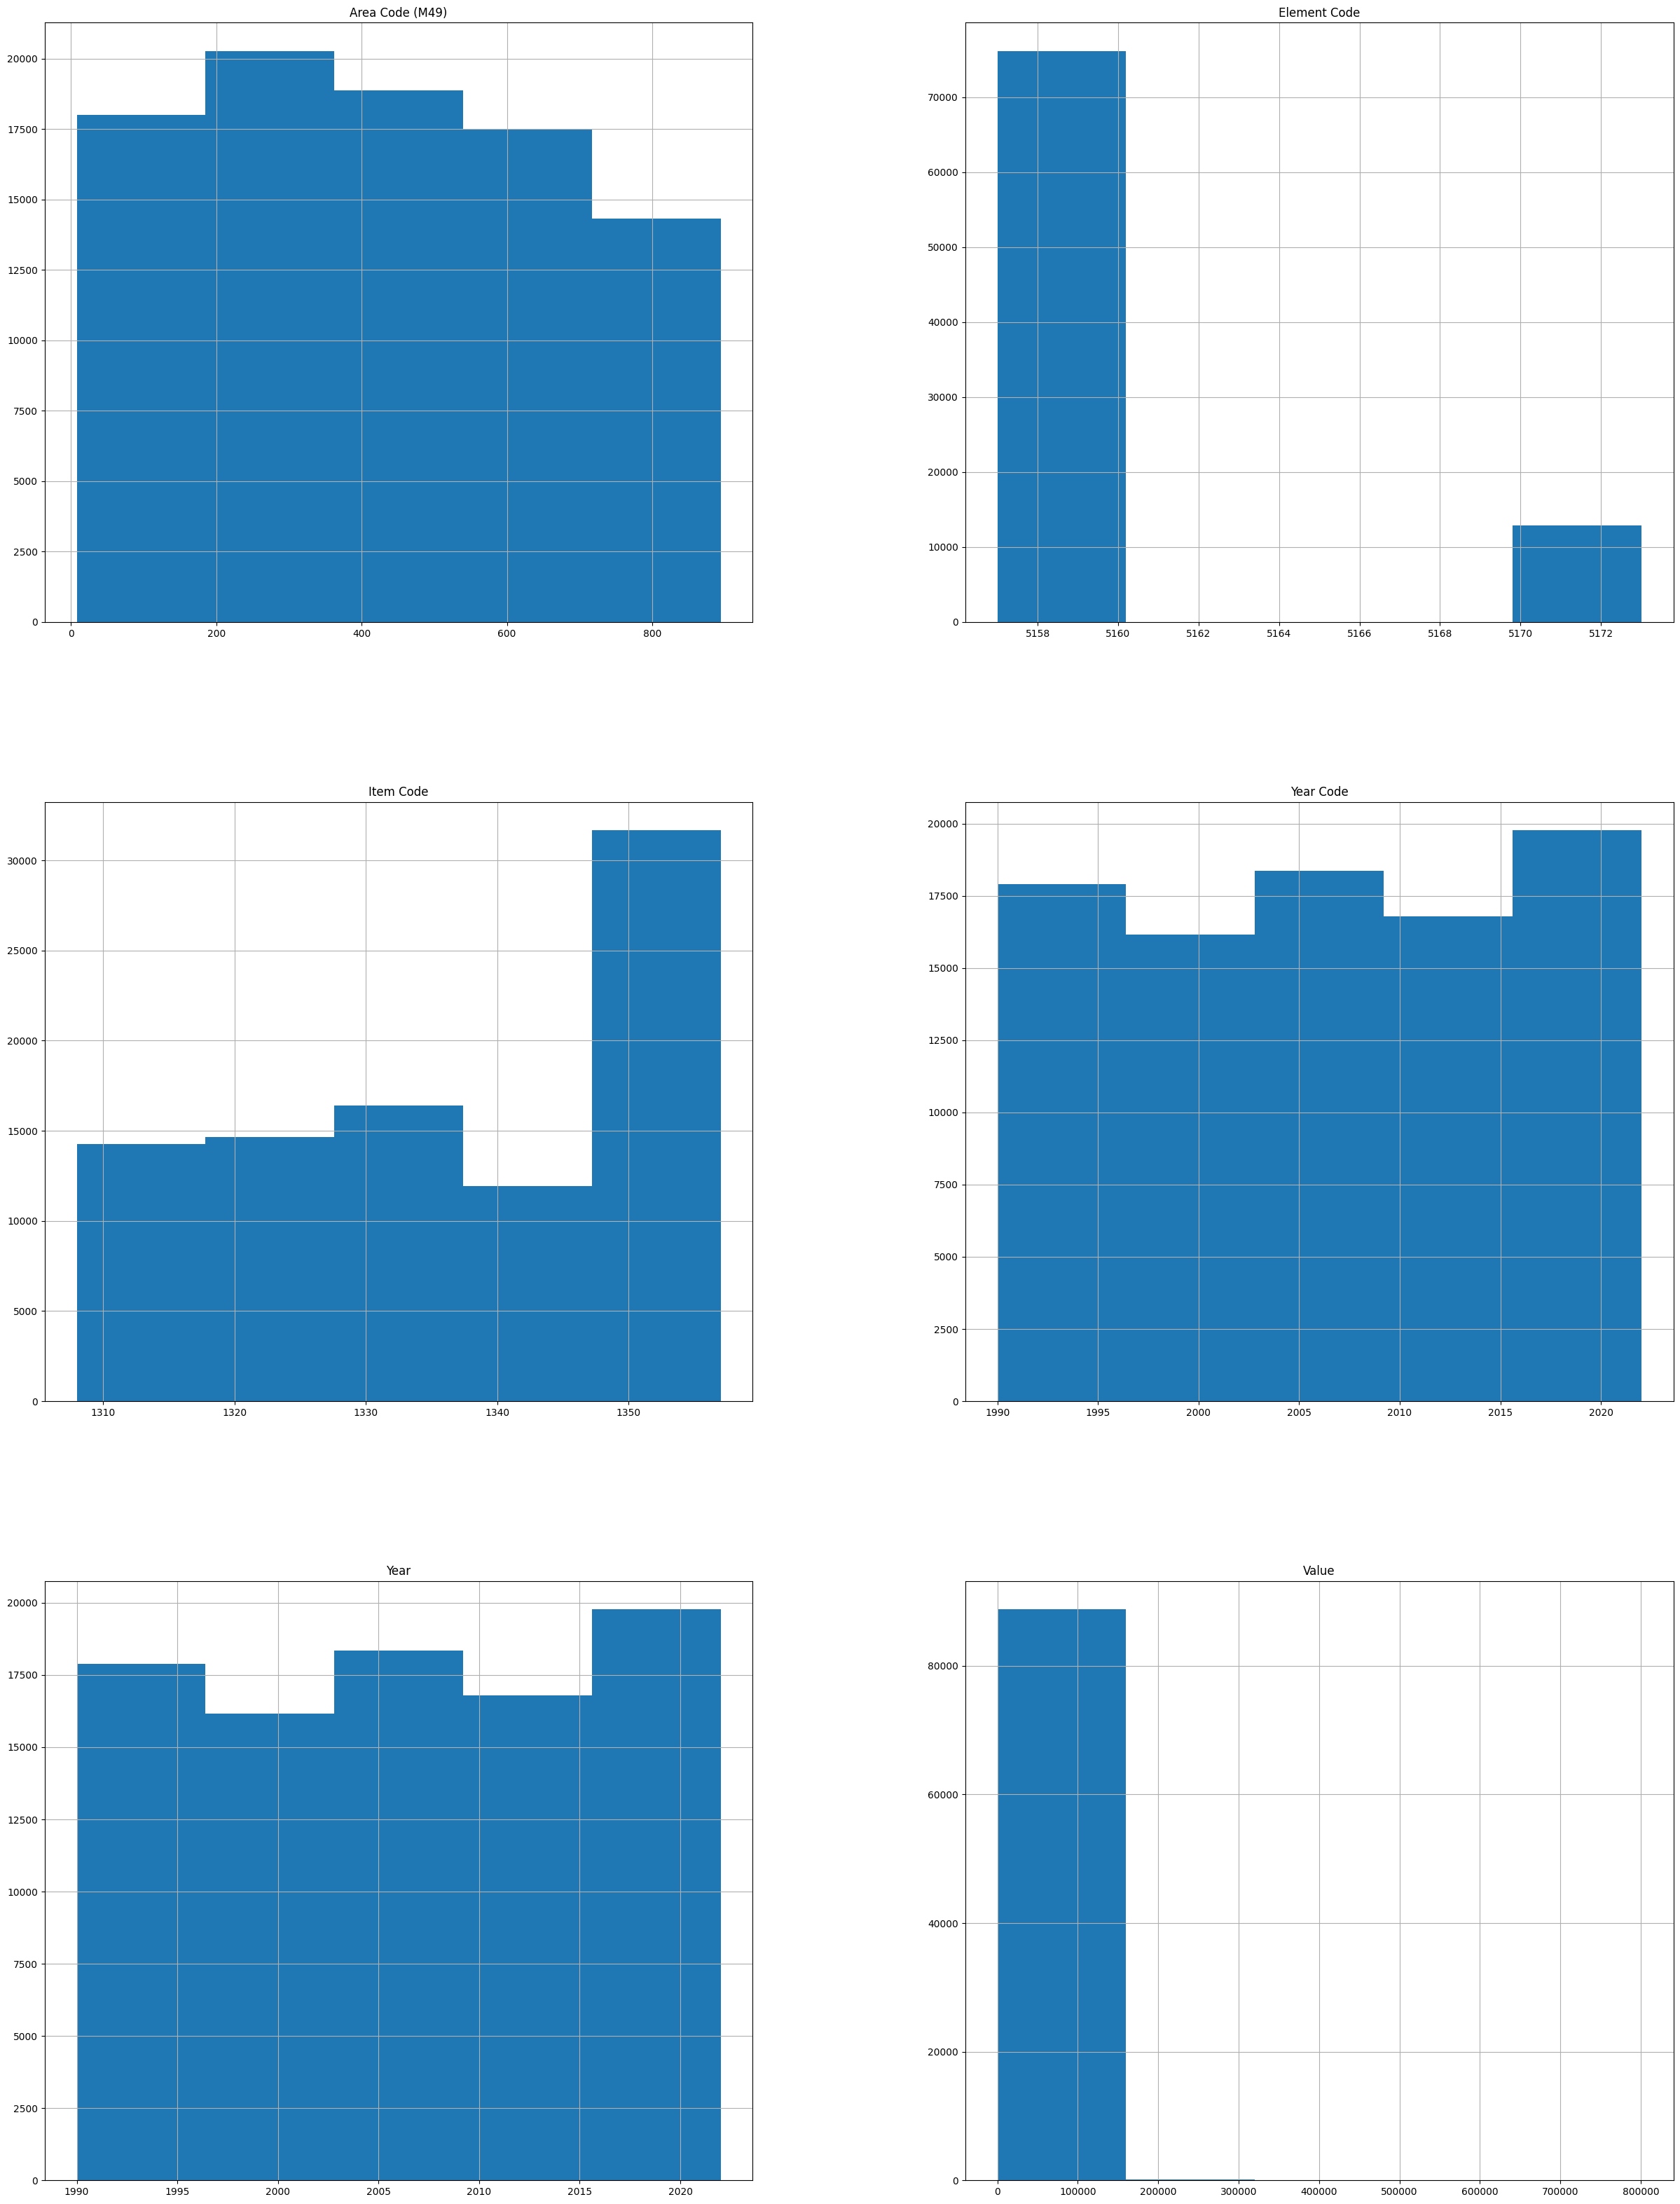

In [55]:
df.hist(bins=5,figsize=(30,40))
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88970 entries, 0 to 88969
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       88970 non-null  object 
 1   Domain            88970 non-null  object 
 2   Area Code (M49)   88970 non-null  int64  
 3   Area              88970 non-null  object 
 4   Element Code      88970 non-null  int64  
 5   Element           88970 non-null  object 
 6   Item Code         88970 non-null  int64  
 7   Item              88970 non-null  object 
 8   Year Code         88970 non-null  int64  
 9   Year              88970 non-null  int64  
 10  Unit              88970 non-null  object 
 11  Value             88970 non-null  float64
 12  Flag              88970 non-null  object 
 13  Flag Description  88970 non-null  object 
 14  Note              88970 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 10.2+ MB


In [57]:
columnas = df.columns
columnas

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [58]:
for columna in columnas:
    print(f"COLUMNA: {columna}")
    df_unique = df[columna].unique()
    print(f"Valores únicos en '{columna}':")
    for valor in df_unique:
        print(f"  - {valor}")
    print("\n")

COLUMNA: Domain Code
Valores únicos en 'Domain Code':
  - RP


COLUMNA: Domain
Valores únicos en 'Domain':
  - Pesticides Use


COLUMNA: Area Code (M49)
Valores únicos en 'Area Code (M49)':
  - 8
  - 12
  - 20
  - 24
  - 660
  - 28
  - 32
  - 51
  - 533
  - 36
  - 40
  - 31
  - 44
  - 48
  - 50
  - 52
  - 112
  - 56
  - 58
  - 84
  - 204
  - 60
  - 64
  - 68
  - 70
  - 72
  - 76
  - 92
  - 96
  - 100
  - 854
  - 108
  - 132
  - 116
  - 120
  - 124
  - 136
  - 140
  - 148
  - 152
  - 159
  - 344
  - 446
  - 156
  - 158
  - 170
  - 174
  - 178
  - 184
  - 188
  - 384
  - 191
  - 192
  - 196
  - 203
  - 200
  - 408
  - 180
  - 208
  - 262
  - 214
  - 218
  - 818
  - 222
  - 226
  - 232
  - 233
  - 748
  - 231
  - 230
  - 238
  - 234
  - 242
  - 246
  - 250
  - 258
  - 266
  - 270
  - 268
  - 276
  - 288
  - 300
  - 304
  - 308
  - 316
  - 320
  - 324
  - 624
  - 332
  - 336
  - 340
  - 348
  - 352
  - 356
  - 360
  - 364
  - 368
  - 372
  - 376
  - 380
  - 388
  - 392
  - 400
  - 398
  - 

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code (M49),88970.0,425.007002,248.587401,8.0,214.00,414.00,634.00,894.00
Element Code,88970.0,5159.382949,5.406086,5157.0,5157.00,5157.00,5157.00,5173.00
Item Code,88970.0,1337.317219,17.218785,1308.0,1322.00,1337.00,1357.00,1357.00
Year Code,88970.0,2006.350669,9.447941,1990.0,1998.00,2007.00,2015.00,2022.00
Year,88970.0,2006.350669,9.447941,1990.0,1998.00,2007.00,2015.00,2022.00
Value,88970.0,2355.121268,17631.473869,0.0,0.64,12.17,258.74,800652.17


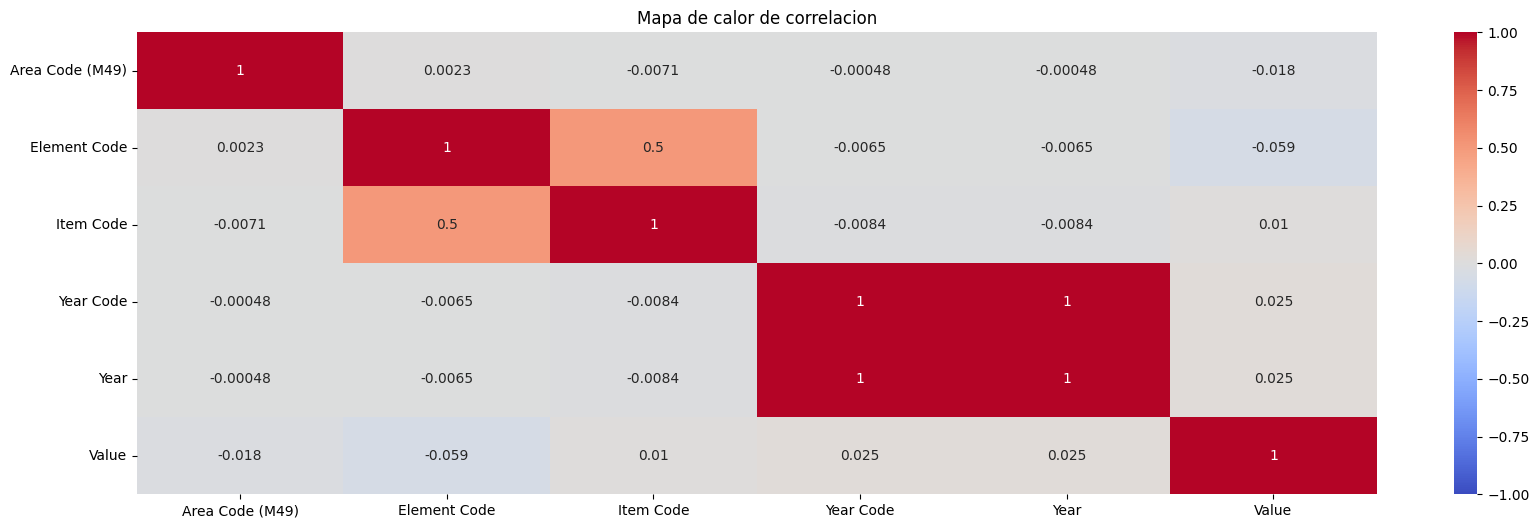

Pares de columnas con correlación fuerte:
Year y Year Code: 1.00


In [60]:
df_corr = df.select_dtypes(include=['int64','float64'])
correlation_matrix = df_corr.corr()
# Establecer un umbral para considerar una correlación como fuerte
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Mapa de calor de correlacion')
plt.show()
threshold = 0.6

# Encontrar pares de columnas con correlación fuerte
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            strong_correlations.append((colname1, colname2, correlation_value))

# Imprimir los resultados
print("Pares de columnas con correlación fuerte:")
for col1, col2, corr in strong_correlations:
    print(f"{col1} y {col2}: {corr:.2f}")

In [61]:
# Correlacion de Spearman
correlacion_spearman = df_corr.corr(method='spearman')
print(correlacion_spearman)

                 Area Code (M49)  Element Code  Item Code  Year Code  \
Area Code (M49)         1.000000      0.001469  -0.006506   0.000647   
Element Code            0.001469      1.000000   0.648734  -0.008847   
Item Code              -0.006506      0.648734   1.000000  -0.008821   
Year Code               0.000647     -0.008847  -0.008821   1.000000   
Year                    0.000647     -0.008847  -0.008821   1.000000   
Value                  -0.002191     -0.437444  -0.343370   0.017904   

                     Year     Value  
Area Code (M49)  0.000647 -0.002191  
Element Code    -0.008847 -0.437444  
Item Code       -0.008821 -0.343370  
Year Code        1.000000  0.017904  
Year             1.000000  0.017904  
Value            0.017904  1.000000  


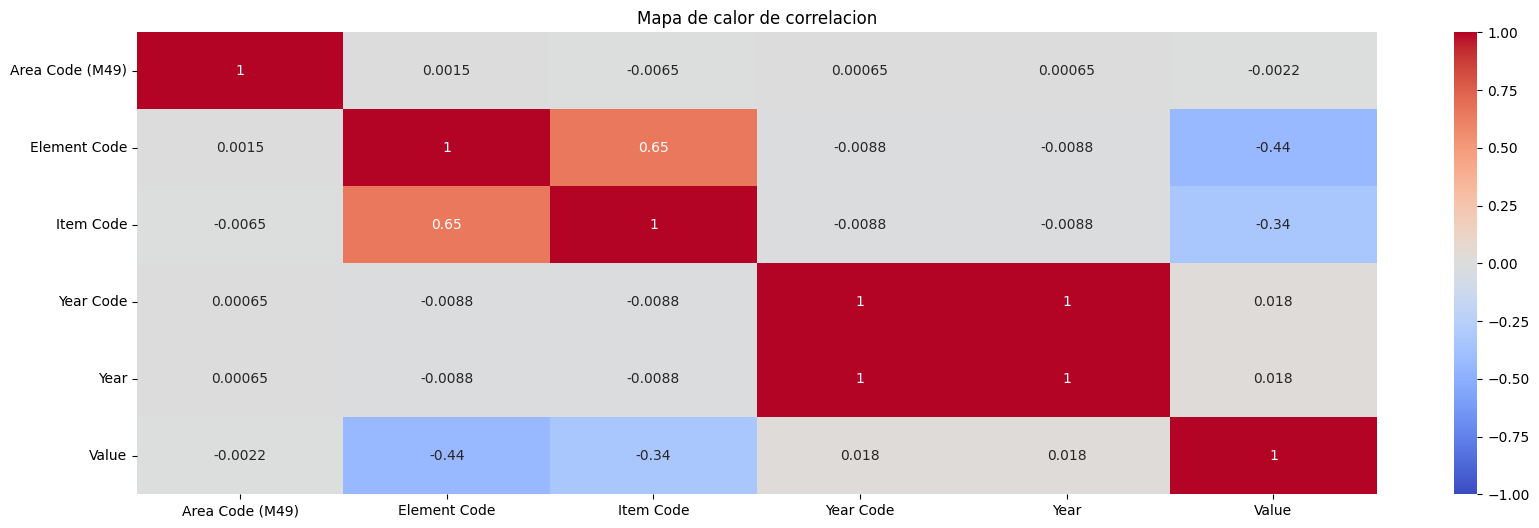

Pares de columnas con correlación fuerte:
Item Code y Element Code: 0.65
Year y Year Code: 1.00


In [62]:
plt.figure(figsize=(20,6))
sns.heatmap(correlacion_spearman,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Mapa de calor de correlacion')
plt.show()
threshold = 0.6

# Encontrar pares de columnas con correlación fuerte
strong_correlations = []
for i in range(len(correlacion_spearman.columns)):
    for j in range(i):
        if abs(correlacion_spearman.iloc[i, j]) > threshold:
            colname1 = correlacion_spearman.columns[i]
            colname2 = correlacion_spearman.columns[j]
            correlation_value = correlacion_spearman.iloc[i, j]
            strong_correlations.append((colname1, colname2, correlation_value))

# Imprimir los resultados
print("Pares de columnas con correlación fuerte:")
for col1, col2, corr in strong_correlations:
    print(f"{col1} y {col2}: {corr:.2f}")

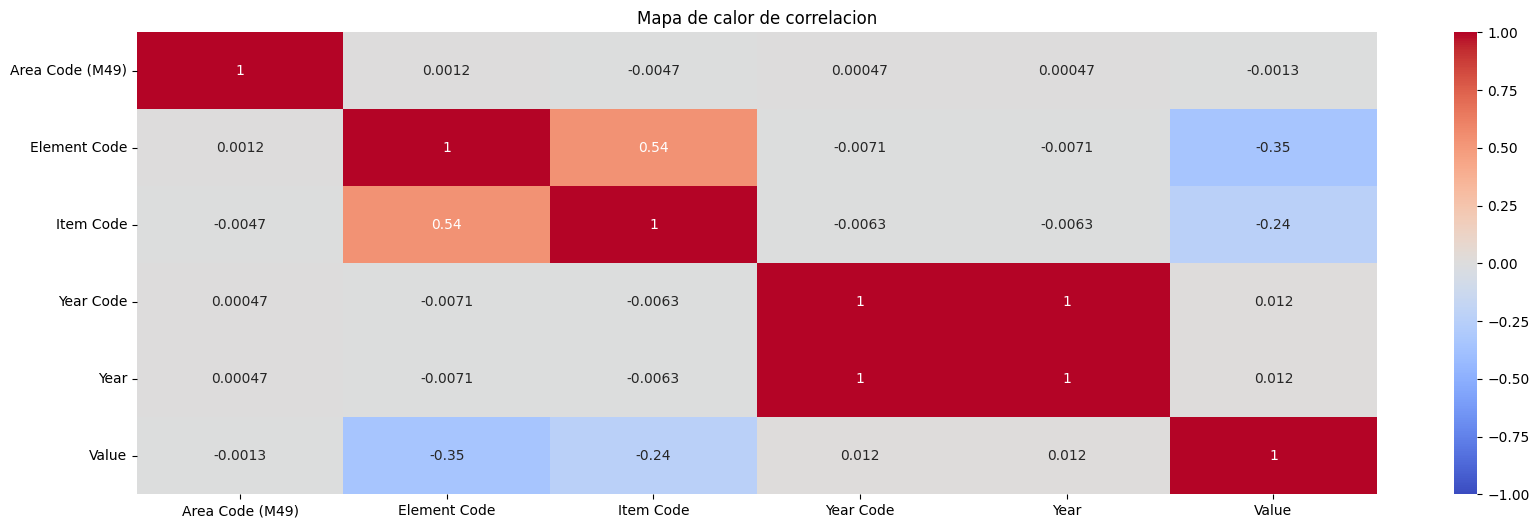

Pares de columnas con correlación fuerte:
Year y Year Code: 1.00


In [63]:
correlacion_kendall = df_corr.corr(method='kendall')

plt.figure(figsize=(20,6))
sns.heatmap(correlacion_kendall,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Mapa de calor de correlacion')
plt.show()
threshold = 0.6

# Encontrar pares de columnas con correlación fuerte
strong_correlations = []
for i in range(len(correlacion_kendall.columns)):
    for j in range(i):
        if abs(correlacion_kendall.iloc[i, j]) > threshold:
            colname1 = correlacion_kendall.columns[i]
            colname2 = correlacion_kendall.columns[j]
            correlation_value = correlacion_kendall.iloc[i, j]
            strong_correlations.append((colname1, colname2, correlation_value))

# Imprimir los resultados
print("Pares de columnas con correlación fuerte:")
for col1, col2, corr in strong_correlations:
    print(f"{col1} y {col2}: {corr:.2f}")

In [64]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,0
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,0
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,0
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [66]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,0
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,0
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,0
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [74]:
df_por_año = df.groupby(['Area Code (M49)','Element Code', 'Year']).size().reset_index(name='Cantidad')
df_por_año

,Area Code (M49),Element Code,Year,Cantidad
0,8,5157,1990,7
1,8,5157,1991,7
2,8,5157,1992,7
3,8,5157,1993,27
4,8,5157,1994,27
...,...,...,...,...
26325,894,5173,2018,1
26326,894,5173,2019,1
26327,894,5173,2020,1
26328,894,5173,2021,1


In [76]:
df_merge = pd.merge(df_por_año, df[['Area Code (M49)', 'Area', 'Element Code', 'Element','Year']],
                    on=['Area Code (M49)', 'Element Code','Year'], how='left').drop_duplicates()

In [77]:
df_merge

,Area Code (M49),Element Code,Year,Cantidad,Area,Element
0,8,5157,1990,7,Albania,Agricultural Use
7,8,5157,1991,7,Albania,Agricultural Use
14,8,5157,1992,7,Albania,Agricultural Use
21,8,5157,1993,27,Albania,Agricultural Use
48,8,5157,1994,27,Albania,Agricultural Use
...,...,...,...,...,...,...
88965,894,5173,2018,1,Zambia,Use per value of agricultural production
88966,894,5173,2019,1,Zambia,Use per value of agricultural production
88967,894,5173,2020,1,Zambia,Use per value of agricultural production
88968,894,5173,2021,1,Zambia,Use per value of agricultural production


In [79]:
import matplotlib
import matplotlib.pyplot as plt

<Figure size 1200x600 with 0 Axes>

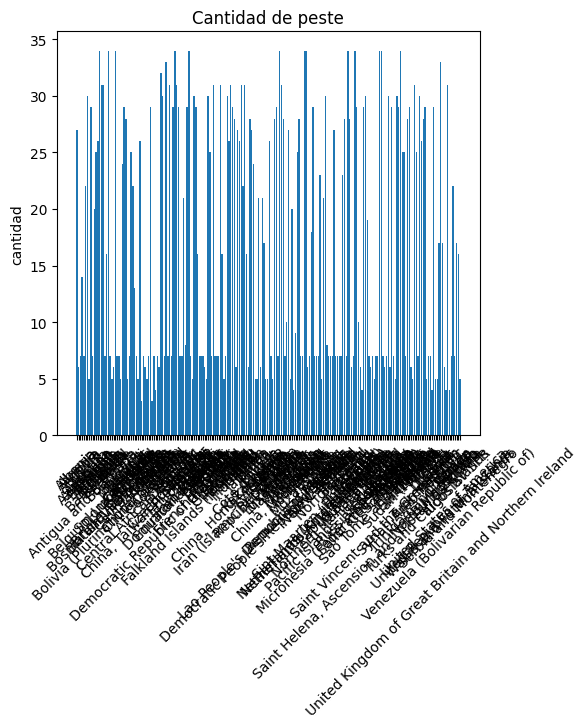

In [80]:

plt.figure(figsize=(12,6))

fig, ax = plt.subplots()
ax.set_ylabel('cantidad')  
ax.set_title('Cantidad de peste')
plt.bar(df_merge['Area'], df_merge['Cantidad'])
# Ajustar el layout
plt.tight_layout()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()